## Titanic with Random Forest and Keras+TensorFlow

### Load and plot data

In [145]:
import pandas as pd

In [146]:
train = pd.read_csv('titanic_train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [147]:
train.shape

(891, 12)

In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [149]:
test = pd.read_csv('titanic_test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

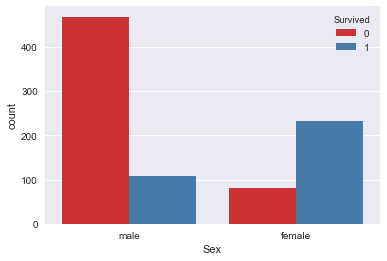

In [151]:
sns.countplot(x='Sex', data=train, hue='Survived', palette='Set1')

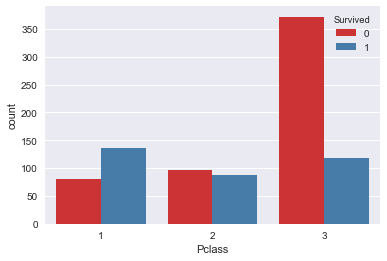

In [152]:
sns.countplot(x='Pclass', data=train, hue='Survived', palette='Set1')

In [153]:
total = pd.concat([train.drop('Survived', axis=1), test], ignore_index=True)
total.shape

(1309, 11)

In [154]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


### Fill in missing Embarked

In [155]:
total[total.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


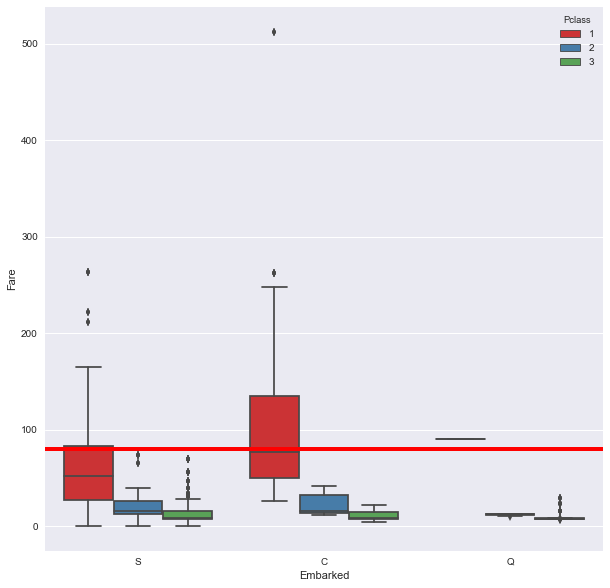

In [156]:
plt.figure(figsize=(10, 10))
# Both fare is 80
plt.axhline(y=80, linewidth=4, color='r')
sns.boxplot(x='Embarked', y='Fare', data=total, hue='Pclass', palette='Set1')

In [157]:
# Both passengers paid $80 and in Pclass 1, so they most likely belonged to Embarked C

total.loc[61,'Embarked'] = 'C'
total.loc[829,'Embarked'] = 'C'

### Fill in missing Fare

In [158]:
total[total.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [159]:
total[(total.Pclass==3) & (total.Embarked=='S')].Fare.median()

8.05

In [160]:
# Fill the missing fare with the median fare for people with pclass=3 and embarked=S

total.loc[1043, 'Fare'] = 8.05

In [161]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


### Create new feature Title

In [162]:
total['Title'] = total.Name.apply(lambda name: name.split(', ')[1].split('. ')[0])

In [163]:
total.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
the Countess      1
Jonkheer          1
Dona              1
Don               1
Capt              1
Lady              1
Sir               1
Mme               1
Name: Title, dtype: int64

In [164]:
title_map = {
    'Capt':'Sir',
    'Don':'Sir',
    'Major':'Sir',
    'Mme':'Mlle',
    'Dona':'Lady',
    'Jonkheer':'Lady',
    'the Countess':'Lady'
}

total['Title'] = total.Title.apply(lambda title: title_map[title] if title in title_map else title)

total.Title.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Rev         8
Dr          8
Sir         5
Col         4
Lady        4
Mlle        3
Ms          2
Name: Title, dtype: int64

### Create FamilySize and FamilyID

In [165]:
total['FamilySize'] = total.SibSp + total.Parch + 1

In [166]:
total['FamilyID'] = total.Name.apply(lambda name: name.split(',')[0]) + total.FamilySize.astype('str')
total.loc[total.FamilySize <= 2, 'FamilyID'] = 'Small'

In [167]:
total.FamilyID.value_counts().head(10)

Small         1025
Sage11          11
Andersson7       9
Goodwin8         8
Asplund7         7
Skoog6           6
Rice6            6
Fortune6         6
Panula6          6
Palsson5         5
Name: FamilyID, dtype: int64

### Convert Cabin column

In [168]:
total.loc[total.Cabin.isnull(), 'Cabin'] = 'X'
total.Cabin = total.Cabin.apply(lambda cabin: cabin[0])

In [169]:
total.Cabin.value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

### Convert all categorical vaues to dummy values

In [170]:
pclass_dummies = pd.get_dummies(total.Pclass, prefix='Pclass')
cabin_dummies = pd.get_dummies(total.Cabin, prefix='Cabin')
embarked_dummies = pd.get_dummies(total.Embarked, prefix='Embarked')
title_dummies = pd.get_dummies(total.Title, prefix='Title')
sibsp_dummies = pd.get_dummies(total.SibSp, prefix='SibSp')
parch_dummies = pd.get_dummies(total.Parch, prefix='Parch')
familyID_dummies = pd.get_dummies(total.FamilyID, prefix='FamilyID')
familySize_dummies = pd.get_dummies(total.FamilySize, prefix='FamilySize')

total = pd.concat([total, 
                   pclass_dummies, 
                   cabin_dummies, 
                   embarked_dummies, 
                   title_dummies, 
                   sibsp_dummies, 
                   parch_dummies, 
                   familyID_dummies, 
                   familySize_dummies], axis=1)

total.Sex = total.Sex.map({'female':0, 'male':1})

total = total.drop(['PassengerId', 
                    'Pclass', 
                    'Name', 
                    'Ticket', 
                    'Cabin', 
                    'Embarked', 
                    'Title', 
                    'SibSp', 
                    'Parch', 
                    'FamilyID', 
                    'FamilySize'], axis=1)

In [171]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 150 entries, Sex to FamilySize_11
dtypes: float64(2), int64(1), uint8(147)
memory usage: 218.7 KB


### Fill in missing Ages predicted by Decision Tree

In [172]:
from sklearn.tree import DecisionTreeRegressor

In [173]:
X = total[total.Age.notnull()].drop('Age', axis=1)

In [174]:
y = total[total.Age.notnull()]['Age']

In [175]:
dtr = DecisionTreeRegressor(max_depth=5)

In [176]:
dtr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [177]:
X_test = total[total.Age.isnull()].drop('Age', axis=1)

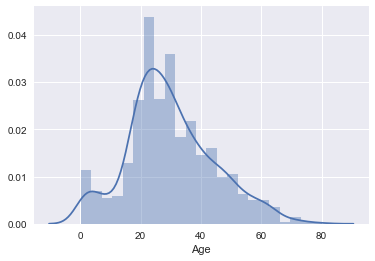

In [178]:
# Age distribution before filling in missing ages

sns.distplot(total.Age[total.Age.notnull()])

In [179]:
total.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [180]:
total.loc[total.Age.isnull(), 'Age'] = dtr.predict(X_test)

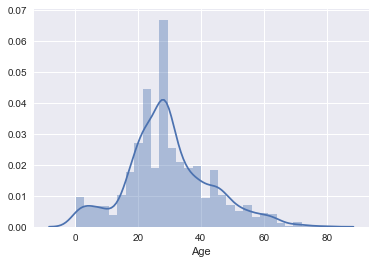

In [181]:
# Age distribution after filling in missing ages

sns.distplot(total.Age)

In [182]:
total.Age.describe()

count    1309.000000
mean       29.684163
std        13.416571
min         0.170000
25%        22.000000
50%        28.318910
75%        37.000000
max        80.000000
Name: Age, dtype: float64

In [183]:
total.isnull().values.any()

False

In [184]:
total.isnull().sum().sum()

0

### Modelling using Random Forest

In [185]:
X = total.head(891)
y = train.Survived
X_test = total.iloc[891:]

In [186]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(X, y)

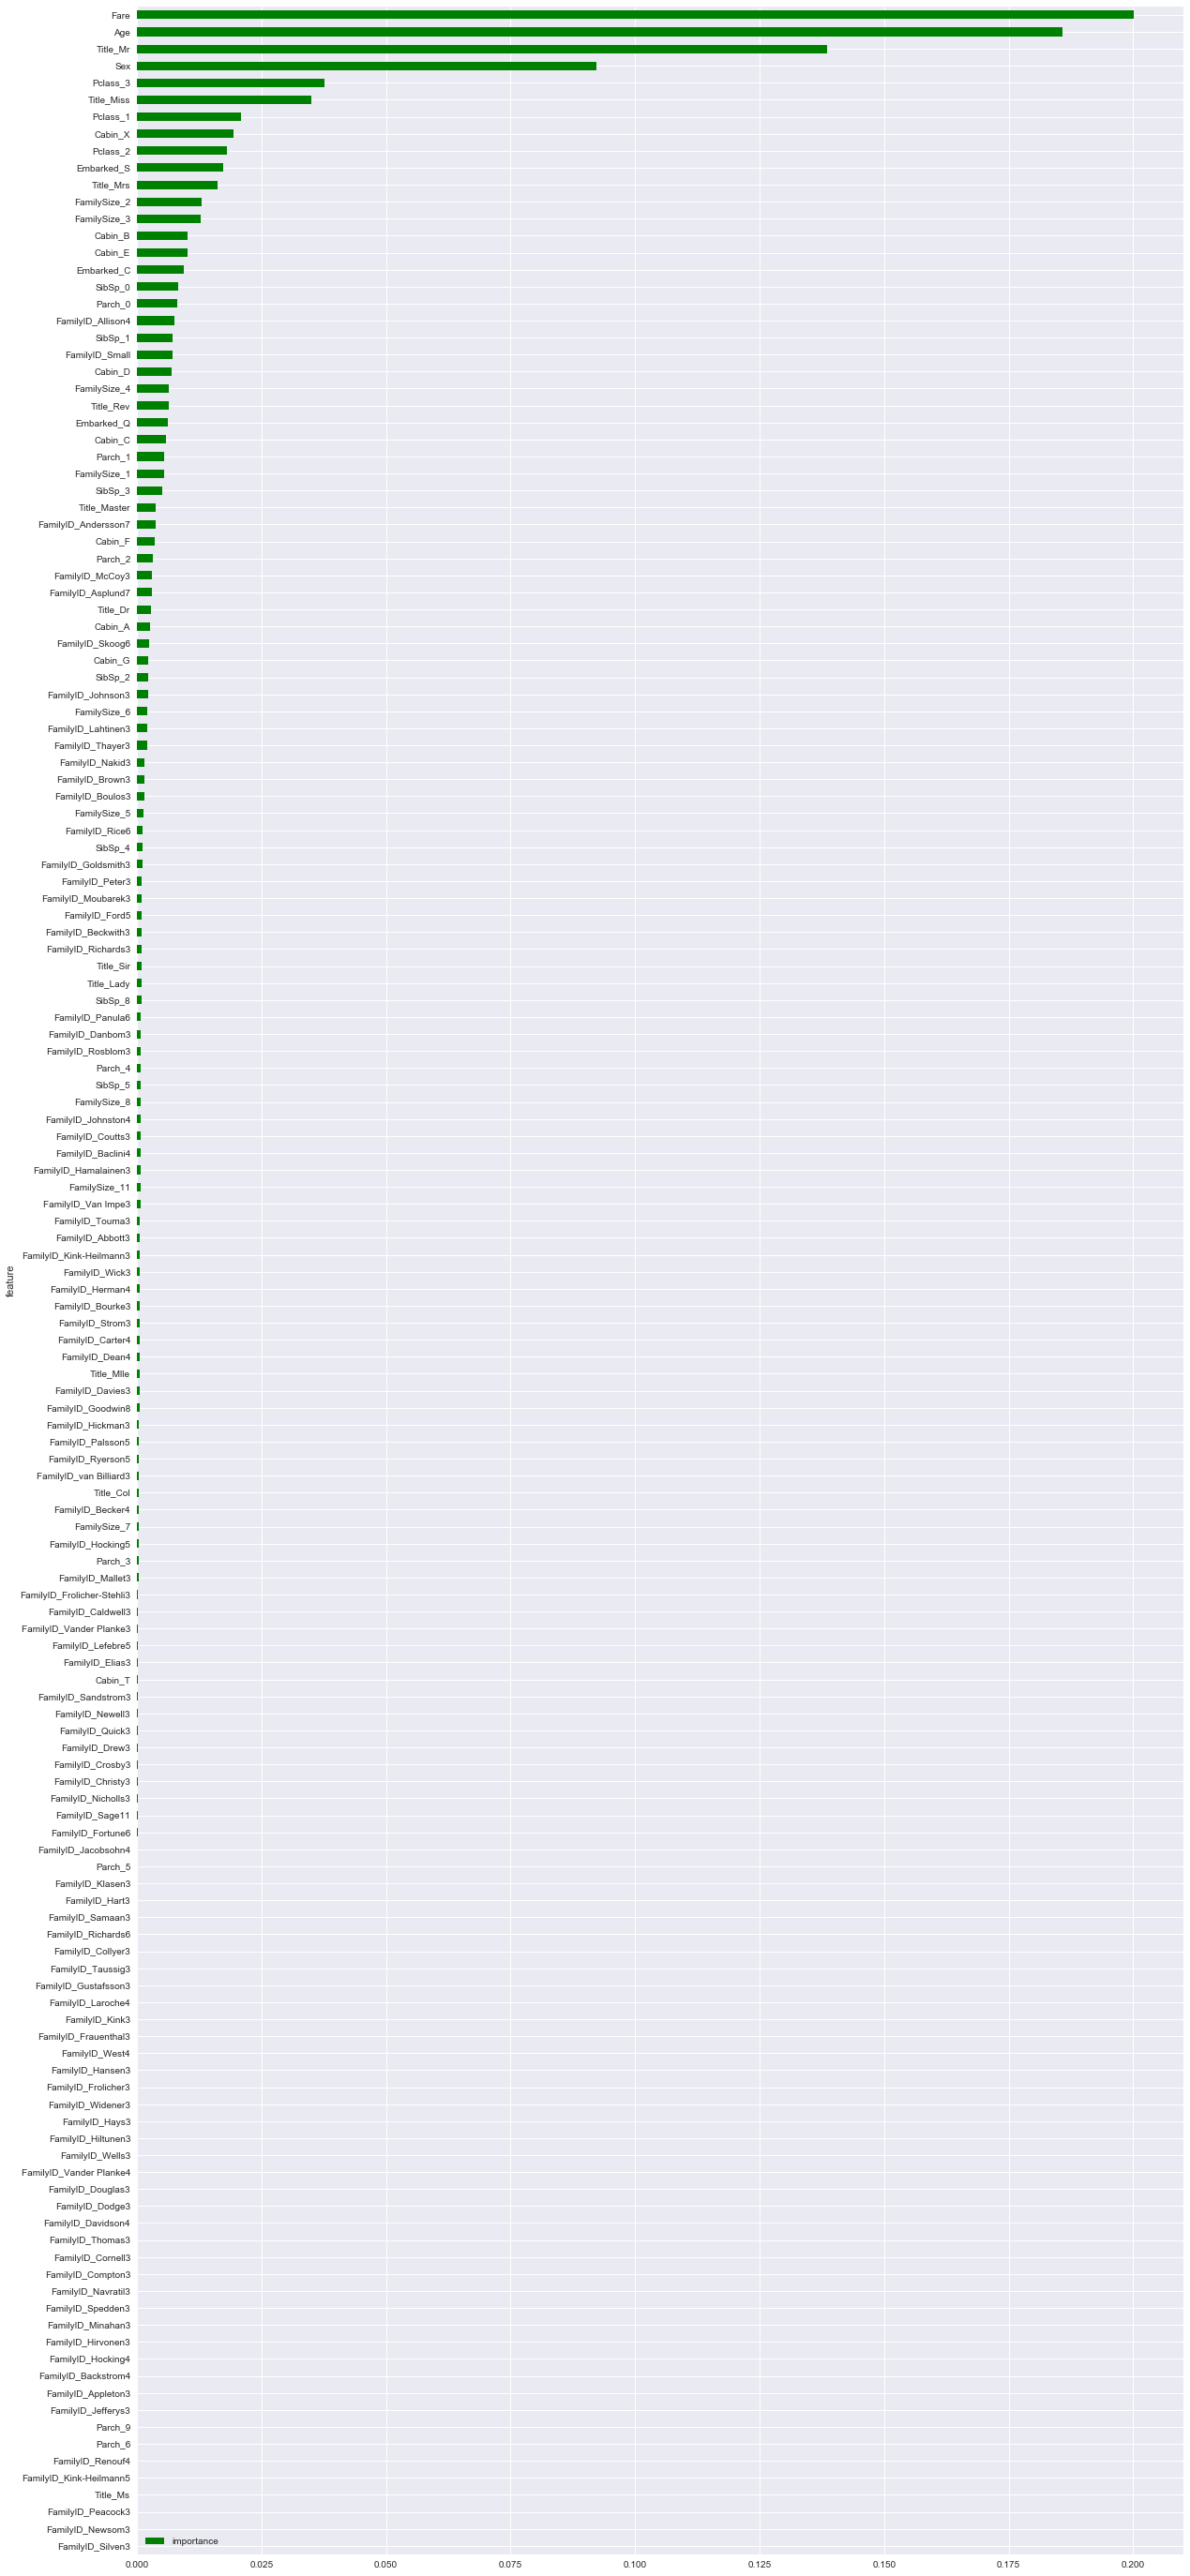

In [187]:
# Show top features

features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 50), color='g')

In [188]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [189]:
parameters = {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 8}
    
model = RandomForestClassifier(**parameters, random_state=123)

In [190]:
cross_val_score(model, X, y, cv = 5, scoring='accuracy').mean()

0.82272107786864768

### Try GridSearch to find best parameters

In [205]:
parameter_grid = {
                 'max_depth': [4, 6, 8],
                 'n_estimators': [10, 50],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [3, 5, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False]
                 }

model = RandomForestClassifier(random_state=7)

grid = GridSearchCV(model,
                    scoring='accuracy',
                    param_grid=parameter_grid,
                    cv=5)

grid.fit(X, y)

print('Best score: {}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))

Best score: 0.8294051627384961
Best parameters: {'min_samples_split': 3, 'n_estimators': 50, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 8, 'bootstrap': True}


In [206]:
predictions = grid.predict(X_test)

In [207]:
submission = pd.DataFrame({
             "PassengerId": test.PassengerId,
             "Survived": predictions
             })

# score: 0.78469
submission.to_csv('result_grid.csv', index=False)

### Try Keras and TensorFlow

In [67]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [208]:
print(X.shape, y.shape)

(891, 150) (891,)


In [209]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(150, use_bias=True, activation='relu', input_shape=(150,)))

# Add one hidden layer 
model.add(Dense(20, use_bias=True, activation='relu'))

# Add an output layer 
model.add(Dense(1, use_bias=True, activation='sigmoid'))

In [210]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_8 (Dense)              (None, 20)                3020      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 25,691.0
Trainable params: 25,691
Non-trainable params: 0.0
_________________________________________________________________


[array([[ 0.01669706,  0.06210069, -0.0690068 , ...,  0.03563854,
          0.08366601, -0.07583442],
        [ 0.1207756 , -0.10858715,  0.13714652, ...,  0.01049362,
          0.09131455,  0.02239259],
        [ 0.07993969, -0.1023775 ,  0.11426891, ...,  0.05319843,
         -0.13339053,  0.00782064],
        ..., 
        [ 0.05257587,  0.06766792,  0.06081393, ..., -0.01886918,
          0.00154513,  0.01506697],
        [-0.13843814,  0.12266426, -0.11651969, ..., -0.0032711 ,
         -0.14131381, -0.04272817],
        [-0.03680253,  0.07800218,  0.00876462, ...,  0.08546977,
          0.02024502,  0.06430982]], dtype=float32),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [211]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [212]:
from sklearn.model_selection import train_test_split
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [213]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [214]:
import numpy as np

y_train = np.array(y_train)
y_test = np.array(y_test)

In [215]:
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
668/668 [==============================] - 0s - loss: 0.5226 - acc: 0.7725     
Epoch 2/20
668/668 [==============================] - 0s - loss: 0.3638 - acc: 0.8488     
Epoch 3/20
668/668 [==============================] - 0s - loss: 0.3421 - acc: 0.8503     
Epoch 4/20
668/668 [==============================] - 0s - loss: 0.3243 - acc: 0.8638     
Epoch 5/20
668/668 [==============================] - 0s - loss: 0.3208 - acc: 0.8653     
Epoch 6/20
668/668 [==============================] - 0s - loss: 0.3094 - acc: 0.8728     
Epoch 7/20
668/668 [==============================] - 0s - loss: 0.3026 - acc: 0.8817     
Epoch 8/20
668/668 [==============================] - 0s - loss: 0.3106 - acc: 0.8668     
Epoch 9/20
668/668 [==============================] - 0s - loss: 0.2925 - acc: 0.8743     
Epoch 10/20
668/668 [==============================] - 0s - loss: 0.3053 - acc: 0.8743     
Epoch 11/20
668/668 [==============================] - 0s - loss: 0.2852 - acc: 0.8832   

In [216]:
y_pred = model.predict_classes(X_test)

 32/223 [===>..........................] - ETA: 0s

In [217]:
# Loss and the accuracy
score = model.evaluate(X_test, y_test, verbose=1)

print(score)

 32/223 [===>..........................] - ETA: 0s[0.60283396035566461, 0.84753362907957064]


In [218]:
# Import the modules from sklearn.metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Precision 
print('\nPrecision:', precision_score(y_test, y_pred))

# Recall
print('\nRecall:', recall_score(y_test, y_pred))

# F1 score
print('\nF1 score:', f1_score(y_test,y_pred))

# Cohen's kappa
print("\nCohen's kappa", cohen_kappa_score(y_test, y_pred))

[[131   8]
 [ 26  58]]

Precision: 0.878787878788

Recall: 0.690476190476

F1 score: 0.773333333333

Cohen's kappa 0.660942670602


### Predict using the test data

In [219]:
X_test = total.iloc[891:]

In [220]:
# Define the scaler 
scaler = StandardScaler().fit(X)

# Scale the train set
X_train = scaler.transform(X)

# Scale the test set
X_test = scaler.transform(X_test)

y_train = np.array(y)

In [221]:
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
891/891 [==============================] - 1s - loss: 0.3624 - acc: 0.8653     
Epoch 2/20
891/891 [==============================] - 0s - loss: 0.2914 - acc: 0.8844     
Epoch 3/20
891/891 [==============================] - 0s - loss: 0.2801 - acc: 0.8934     
Epoch 4/20
891/891 [==============================] - 1s - loss: 0.2781 - acc: 0.8833     
Epoch 5/20
891/891 [==============================] - 0s - loss: 0.2715 - acc: 0.8934     
Epoch 6/20
891/891 [==============================] - 0s - loss: 0.2717 - acc: 0.8945     
Epoch 7/20
891/891 [==============================] - 0s - loss: 0.2676 - acc: 0.8855     
Epoch 8/20
891/891 [==============================] - 0s - loss: 0.2660 - acc: 0.8911     
Epoch 9/20
891/891 [==============================] - 0s - loss: 0.2635 - acc: 0.8878     
Epoch 10/20
891/891 [==============================] - 0s - loss: 0.2693 - acc: 0.8855     
Epoch 11/20
891/891 [==============================] - 1s - loss: 0.2916 - acc: 0.8855   

In [222]:
y_pred = model.predict_classes(X_test)

 32/418 [=>............................] - ETA: 0s

In [223]:
predictions = [item for sublist in y_pred.tolist() for item in sublist]

In [224]:
submission = pd.DataFrame({
             "PassengerId": test.PassengerId,
             "Survived": predictions
             })

# score: 0.80383
submission.to_csv('result_keras.csv', index=False)